## ML LAb ASSG 0-5 Till next monday - 
- Assg 01 - Installation of anaconda
- Assg 02 - basics of NumPy,Pandas, Matplotlib, Seaborn, Sklearn.
- Assg 03 - MLP classifier and regressor
- Assg 04 - Naie byes classifier and regressor
- Assg 05 - SVM classifier and regressor

- Assg 06 - Kmeans clustering
- Assg 07 - KNN regresor and classifier
- Assg 08 - 

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
    - 1 building_windows_float_processed
    - 2 building_windows_non_float_processed
    - 3 vehicle_windows_float_processed
    - 4 vehicle_windows_non_float_processed (none in this database)
    - 5 containers
    - 6 tableware
    - 7 headlamps
    

Float Processed: silica sand (73%), calcium oxide (9%), soda (13%) and magnesium (4%)
Non_Float_Processed: 

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans


In [4]:
df = pd.read_csv('glass.csv')


In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.shape

(214, 10)

In [7]:
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

#### Since we are going for unsupervised. We are dropping Target column `Type`

In [8]:
df.drop(['Type'],axis=1,inplace=True)

In [9]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


### Create  'ID' columnm

- 1) It will help to identify which glass/observation belongs to which cluster
- 2) So indexs may get dropped with outlier treatment

In [10]:
df['ID'] = df.index + 100

In [11]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,100
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,101
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,102
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,103
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,104


What are the  two important pre-processing steps for clustering?
- 1 Outlier treatment
- 2 Feature Scaling  


In [18]:
list(enumerate(df.columns[:-1]))

[(0, 'RI'),
 (1, 'Na'),
 (2, 'Mg'),
 (3, 'Al'),
 (4, 'Si'),
 (5, 'K'),
 (6, 'Ca'),
 (7, 'Ba'),
 (8, 'Fe')]

In [19]:
f = df.columns[:-1]

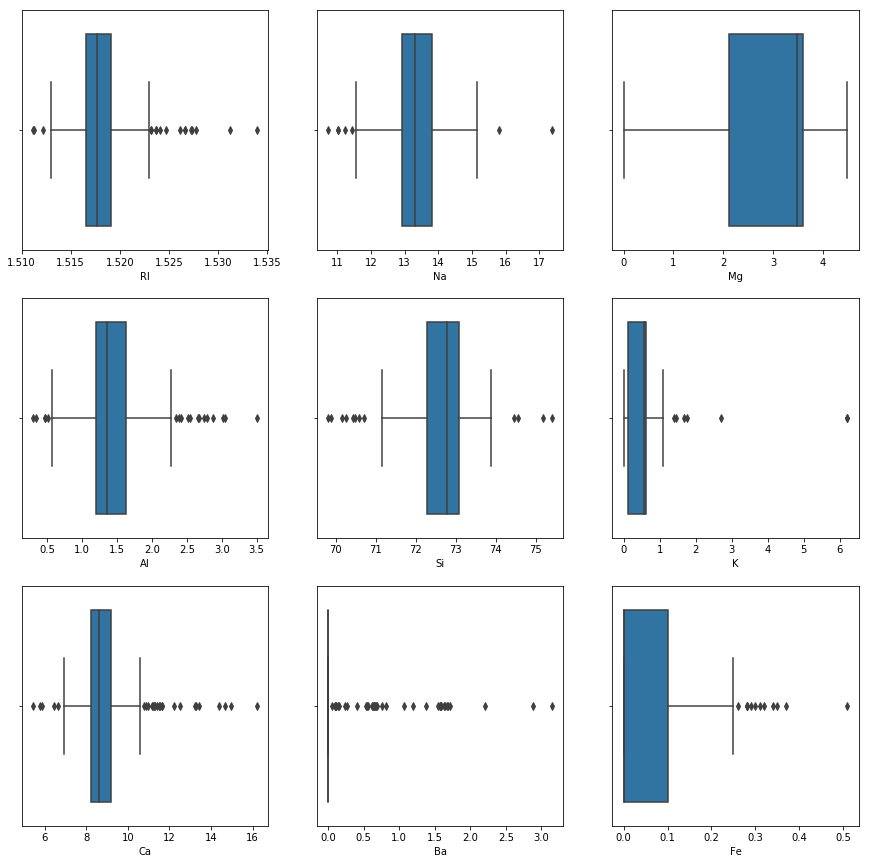

In [21]:
plt.figure(figsize=(15,15))
for col in enumerate(f):
    plt.subplot(3,3,col[0] + 1)
    sns.boxplot(data=df, x=col[1])

### How to deal with outliers?

1. You may drop them.
    - When you have less outliers.
    - And you have good amount of data.
2. Capping.
    - We restrict the outliers at certain percentile.
    - Soft Capping: We use 1-99 as the percentile cutoff
        - I am least disturbing the data or I am least changing the data.
        - When you have less outliers and you don't have the option to drop, then you may use this capping range.
    - Hard Capping: We use 5-95 as the percentile cutoff
        - A lot of data will be getting changed.
        - We may use it if the column is having so may outliers and is the only column in the data with the outlier.
3. Doing Nothing
    - If all the columns/most of the columns are having outliers in a certain range(above or below), then we may ignore/leave them, because they may form a cluster of itself.
4. Transformation
    - We may also transform the data into new dimesnsions where I don't have any influence of the outliers and hence no treatment is required.
        - PCA
        - LOG
        - POWER

### Outliers

In [22]:
f

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [23]:
for i in f:
    q1 = df[i].quantile(0.01)
    q3 = df[i].quantile(0.99)
    df[i][df[i] < q1] = q1
    df[i][df[i] > q3] = q3
    #df[i]  = df[i].apply(lambda x:x if x<q1 else q1)
    #df[i]  = df[i].apply(lambda x:x if x>q3 else q3)

C:\Users\kphan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\kphan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\kphan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\kphan\An

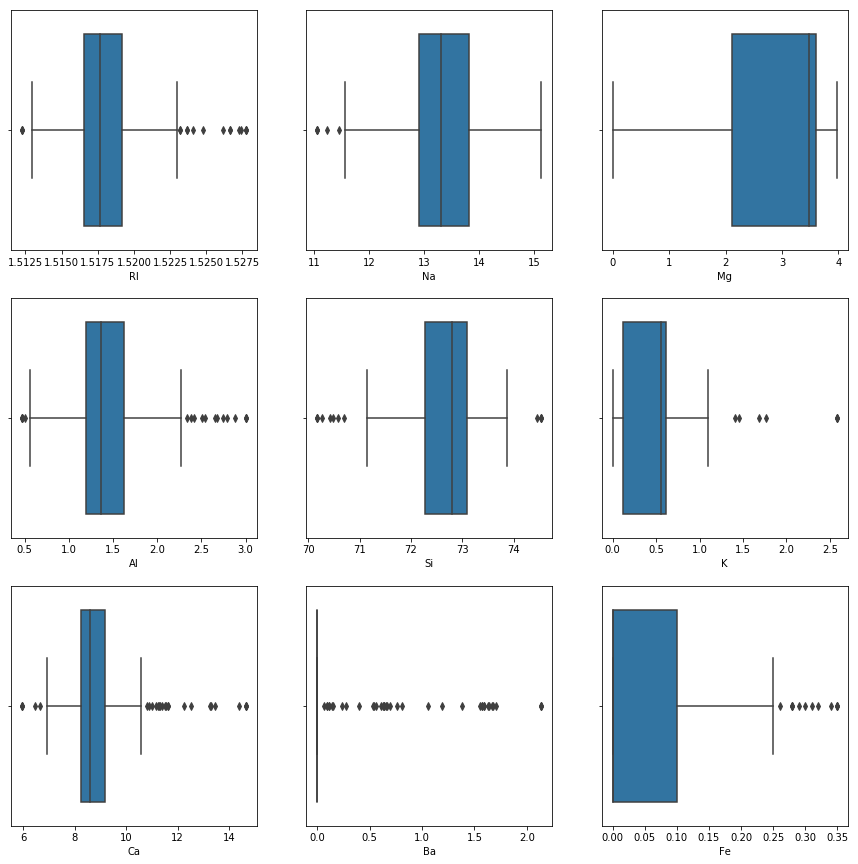

In [24]:
plt.figure(figsize=(15,15))
for col in enumerate(f):
    plt.subplot(3,3,col[0] + 1)
    sns.boxplot(data=df, x=col[1])

### Scaling



#### Very important to keep all the columns intact in the same unit/scale because distance calulation can
#### get influenced because of different units for various columns and wihth in columns

In [2]:
from sklearn.preprocessing import StandardScaler

In [26]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID
0,1.52101,13.64,3.9648,1.10,71.78,0.06,8.75,0.0,0.0,100
1,1.51761,13.89,3.6000,1.36,72.73,0.48,7.83,0.0,0.0,101
2,1.51618,13.53,3.5500,1.54,72.99,0.39,7.78,0.0,0.0,102
3,1.51766,13.21,3.6900,1.29,72.61,0.57,8.22,0.0,0.0,103
4,1.51742,13.27,3.6200,1.24,73.08,0.55,8.07,0.0,0.0,104


In [28]:
ss = StandardScaler()
df_2 = ss.fit_transform(df.drop("ID", axis=1))

In [30]:
df_2 = pd.DataFrame(df_2)

In [33]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'ID'], dtype='object')

In [34]:
df_2.columns = df.columns[:-1]
df_2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.950549,0.319899,0.893132,-0.707909,-1.170586,-1.021903,-0.147013,-0.367626,-0.597741
1,-0.255286,0.647661,0.639148,-0.172494,0.112257,0.044327,-0.817870,-0.367626,-0.597741
2,-0.762446,0.175684,0.604337,0.198179,0.463350,-0.184151,-0.854329,-0.367626,-0.597741
3,-0.237553,-0.243851,0.701809,-0.316644,-0.049787,0.272804,-0.533485,-0.367626,-0.597741
4,-0.322671,-0.165188,0.653073,-0.419608,0.584883,0.222032,-0.642864,-0.367626,-0.597741


### Steps For Clustering

- Preprocessing
    - Outlier Treatment
    - Scaling
- Check for Cluster Tendency: Here we will check if the data which we are using for clustering is actually having some clusters or not?
    - Hopkins Score
- Find the value of K
    - Business Logic
    - Silhouette
    - Elbow/SSD
- Run Final K-Means Algo
    - Use the value of K that was found out in the last step
- Cluster Profiling
    - Trying to make sense out of the cluster formed.
    - Finding the overall profile/property of the cluster formed
    

In [35]:
## Check the HOPKINS
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [45]:
hopkins(df_2)

0.8092741953885753

In [3]:
# Let's run K-Means with different value of  K to check SILHOUETTE SCORE
from sklearn.metrics import silhouette_score
sil = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k, random_state=0).fit(df_2)
    
    sil.append([k,silhouette_score(df_2,kmean.labels_)])
   
 
    

In [57]:
sil

[[2, 0.40582179495797444],
 [3, 0.3673729456231888],
 [4, 0.3896579135790243],
 [5, 0.36383492856687755],
 [6, 0.33201129969721604],
 [7, 0.3470784394455467],
 [8, 0.3511437557089502],
 [9, 0.291115029603198],
 [10, 0.30214868505570397]]

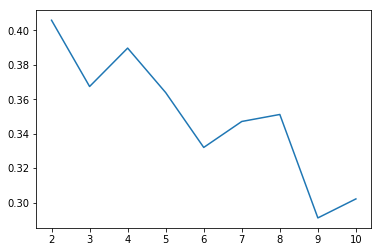

In [59]:
sil = pd.DataFrame(sil)
plt.plot(sil[0], sil[1])
plt.show()

In [52]:
kmean.labels_

array([0, 7, 7, 7, 7, 6, 7, 7, 1, 7, 6, 7, 6, 6, 7, 7, 7, 0, 1, 7, 6, 0,
       7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 7, 7, 1, 7, 0, 0, 7, 7, 7, 0,
       6, 1, 6, 0, 0, 1, 0, 1, 7, 7, 7, 6, 6, 7, 7, 7, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 6, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 6, 7, 6, 7, 7, 1, 6, 6, 7, 7, 6, 7, 6, 0, 0, 3, 3, 3, 4, 4,
       3, 3, 3, 1, 7, 1, 1, 7, 6, 7, 7, 6, 7, 7, 1, 1, 7, 1, 1, 1, 4, 3,
       7, 1, 7, 6, 6, 7, 7, 7, 7, 6, 6, 7, 6, 6, 1, 7, 7, 7, 6, 0, 1, 7,
       7, 7, 7, 0, 1, 1, 1, 6, 6, 9, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 6, 4,
       1, 1, 1, 1, 2, 2, 4, 4, 2, 9, 9, 1, 0, 0, 2, 2, 2, 8, 8, 2, 2, 2,
       2, 2, 2, 7, 2, 8, 2, 8, 8, 9, 2, 2, 8, 8, 8, 8])

### RULE FOR CHOOSING VALUE OF K

- Never go with k=2 as the option because it means you divide the complete data into two halfs and it's not useful for any business case.
- If you have option to choose between two values of K, always go with a lesser value.
- Since we will be taking business decisions based on the cluster result, it's awlays a good idea to go with a lower value of K so that it's easy to take and implement business decisions.
- Silhouette: That value of k for which the score is maximum
- Elbow, you look at the elbow of the curve

C:\Users\kphan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\kphan\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\kphan\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


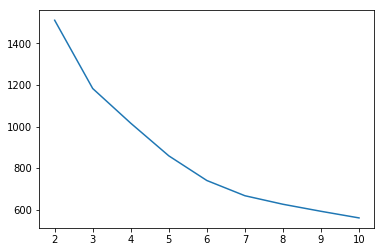

In [64]:
# Elbow
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df_2)
    ssd.append([k, kmean.inertia_])
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])
plt.show()

In [ ]:
KMeans()

In [77]:
## K=3 Final KMeans Analysis
kmean = KMeans(n_clusters=3, random_state=0)
kmean.fit(df_2)

KMeans(n_clusters=3, random_state=0)

In [78]:
kmean.labels_

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [79]:
df['label'] = kmean.labels_

In [80]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID,label
0,1.52101,13.64,3.9648,1.10,71.78,0.06,8.75,0.0,0.0,100,2
1,1.51761,13.89,3.6000,1.36,72.73,0.48,7.83,0.0,0.0,101,0
2,1.51618,13.53,3.5500,1.54,72.99,0.39,7.78,0.0,0.0,102,0
3,1.51766,13.21,3.6900,1.29,72.61,0.57,8.22,0.0,0.0,103,0
4,1.51742,13.27,3.6200,1.24,73.08,0.55,8.07,0.0,0.0,104,0


In [81]:
df.label.value_counts()

0    135
2     50
1     29
Name: label, dtype: int64

### Cluster Profiling

Add the labels generated by the algo back to the original dataframe

In [82]:
df.groupby("label")[["K","Ca","Ba","Fe"]].mean()

,K,Ca,Ba,Fe
label,,,,
0,0.617284,8.414356,0.016148,0.062721
1,0.171724,8.478138,0.989055,0.013448
2,0.213400,10.676816,0.095526,0.063174


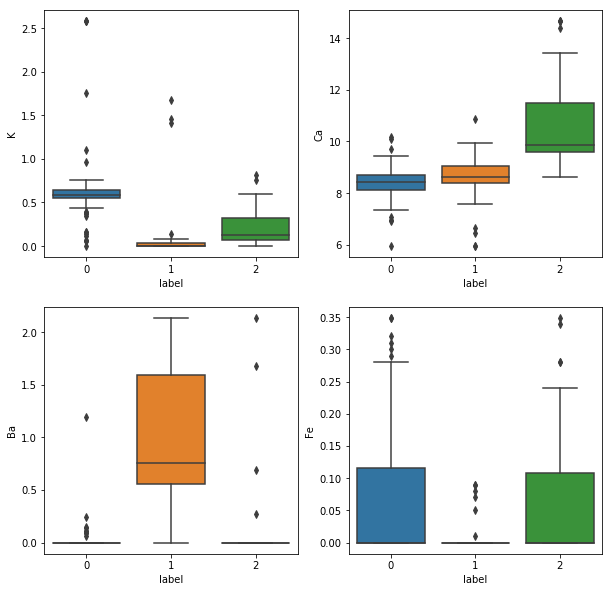

In [83]:
f = ["K", "Ca", "Ba", "Fe"]
plt.figure(figsize=(10,10))
for i in enumerate(f):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(data=df, x='label', y=i[1])

### Check how many observations are clustered in each cluster?


### Profile



0 : Consists rich 'Fe' Glasses <br>
1 : Consists rich 'Ba' Glasses <br>
2 : Consists rich 'Ca' Glasses <br>

In [88]:
df[df['label'] == 1].ID

163    263
180    280
181    281
182    282
184    284
186    286
190    290
191    291
192    292
193    293
194    294
195    295
196    296
197    297
198    298
199    299
200    300
202    302
203    303
204    304
205    305
206    306
207    307
208    308
209    309
210    310
211    311
212    312
213    313
Name: ID, dtype: int64

# second dataset 

In [245]:
df = pd.read_excel('Attribute DataSet.xlsx')
df.shape

(500, 14)

In [246]:
df.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [247]:
df.drop('Dress_ID',axis=1,inplace=True)
df.shape

(500, 13)

In [248]:
df.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [249]:
df.isna().sum()

Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
FabricType        266
Decoration        236
Pattern Type      109
Recommendation      0
dtype: int64

- as we can observe that more than 50% data is missing for column fabricType and Decoration hence we have to drop tht column.

In [250]:
df.drop(['FabricType', 'Decoration'],axis=1,inplace=True)
df.shape

(500, 11)

In [251]:
df.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,Pattern Type,Recommendation
0,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,animal,1
1,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,animal,0
2,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,print,0
3,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,print,1
4,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,dot,0


In [252]:
df.isna().sum()

Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
Pattern Type      109
Recommendation      0
dtype: int64

In [253]:
df.waiseline.value_counts() # natural

natural     304
empire      104
dropped       4
princess      1
Name: waiseline, dtype: int64

In [254]:
df['waiseline'].fillna(value='natural',axis=0,inplace=True)

In [255]:
df.Material.value_counts() # cotton

cotton           152
polyster          99
silk              26
chiffonfabric     25
mix               12
nylon             10
rayon             10
spandex            5
milksilk           5
cashmere           4
acrylic            3
linen              3
microfiber         3
lycra              3
other              2
shiffon            2
viscos             2
model              1
lace               1
sill               1
knitting           1
wool               1
modal              1
Name: Material, dtype: int64

In [256]:
df['Material'].fillna(value='cotton',axis=0,inplace=True)

In [257]:
df['Pattern Type'].value_counts() # solid

solid        203
print         71
patchwork     48
animal        21
striped       17
dot           14
geometric      5
plaid          3
leopard        3
floral         2
character      1
none           1
splice         1
leapord        1
Name: Pattern Type, dtype: int64

In [258]:
df['Pattern Type'].fillna(value='solid',axis=0,inplace=True)

In [259]:
df.isna().sum()

Style             0
Price             2
Rating            0
Size              0
Season            2
NeckLine          3
SleeveLength      2
waiseline         0
Material          0
Pattern Type      0
Recommendation    0
dtype: int64

In [260]:
df.dropna(axis=0,inplace=True)

In [261]:
df.shape

(493, 11)

In [262]:
df.isna().sum()

Style             0
Price             0
Rating            0
Size              0
Season            0
NeckLine          0
SleeveLength      0
waiseline         0
Material          0
Pattern Type      0
Recommendation    0
dtype: int64

In [263]:
df.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,Pattern Type,Recommendation
0,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,cotton,animal,1
1,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,animal,0
2,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,print,0
3,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,print,1
4,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,dot,0


In [264]:
df.Price.value_counts()

Average      250
Low          126
low           45
Medium        30
very-high     21
high          15
High           6
Name: Price, dtype: int64

In [265]:
df.Price.replace(to_replace=['Low', 'High','Medium','very-high'],value=['low','high','Average','high'],inplace=True)


In [266]:
df.Price.value_counts()

Average    280
low        171
high        42
Name: Price, dtype: int64

In [267]:
df.Style.value_counts()

Casual      230
Sexy         68
party        48
cute         44
vintage      25
bohemian     24
Brief        18
work         17
Novelty       8
sexy          7
Flare         2
OL            1
fashion       1
Name: Style, dtype: int64

In [268]:
df.Style.replace(to_replace=['Sexy', 'Flare','OL','fashion'],value=['sexy','other','other','other'],inplace=True)

In [269]:
df.Style.value_counts()

Casual      230
sexy         75
party        48
cute         44
vintage      25
bohemian     24
Brief        18
work         17
Novelty       8
other         4
Name: Style, dtype: int64

In [270]:
df.Rating.value_counts()

0.0    118
4.7     83
4.8     55
5.0     55
4.6     54
4.5     33
4.4     27
4.9     25
4.3     19
4.0      7
4.2      6
4.1      5
3.7      2
1.0      1
3.5      1
3.6      1
3.0      1
Name: Rating, dtype: int64

In [271]:
df.Size.value_counts()

M        176
free     170
L         93
S         37
XL        15
small      1
s          1
Name: Size, dtype: int64

In [272]:
df.Size.replace(to_replace=['small', 's'],value=['S','S'],inplace=True)
df.Size.value_counts()

M       176
free    170
L        93
S        39
XL       15
Name: Size, dtype: int64

In [273]:
df.Season.value_counts()

Summer    156
Spring    122
Winter     98
Automn     61
winter     45
Autumn      8
spring      2
summer      1
Name: Season, dtype: int64

In [274]:
df.Season.replace(to_replace=['Summer', 'Winter','Spring','Automn'],value=['summer','winter','spring','Autumn'],inplace=True)
df.Season.value_counts()

summer    157
winter    143
spring    124
Autumn     69
Name: Season, dtype: int64

In [275]:
df.NeckLine.value_counts()

o-neck             269
v-neck             123
slash-neck          25
boat-neck           19
turndowncollor      13
Sweetheart          13
bowneck             10
peterpan-collor      6
sqare-collor         5
open                 3
Scoop                2
mandarin-collor      1
ruffled              1
sweetheart           1
backless             1
halter               1
Name: NeckLine, dtype: int64

In [276]:
df.SleeveLength.value_counts()

sleevless         220
short              96
full               95
halfsleeve         35
threequarter       17
thressqatar        10
sleeveless          5
sleeevless          3
capsleeves          3
cap-sleeves         2
sleveless           1
threequater         1
Petal               1
urndowncollor       1
butterfly           1
turndowncollor      1
half                1
Name: SleeveLength, dtype: int64

In [277]:
df.SleeveLength.replace(to_replace=['sleeveless', 'cap-sleeves','sleeevless','half','thressqatar'],value=['sleevless','capsleeves','sleeveless','halfsleeve','thressqatar'],inplace=True)
df.SleeveLength.value_counts()

sleevless         225
short              96
full               95
halfsleeve         36
threequarter       17
thressqatar        10
capsleeves          5
sleeveless          3
Petal               1
threequater         1
sleveless           1
urndowncollor       1
butterfly           1
turndowncollor      1
Name: SleeveLength, dtype: int64

In [278]:
df.SleeveLength.replace(to_replace=['sleeveless','thressqatar','threequarter','thressqatar'],value=['sleevless','threequater','threequater','threequater'],inplace=True)
df.SleeveLength.value_counts()

sleevless         228
short              96
full               95
halfsleeve         36
threequater        28
capsleeves          5
Petal               1
sleveless           1
urndowncollor       1
butterfly           1
turndowncollor      1
Name: SleeveLength, dtype: int64

In [279]:
df.waiseline.value_counts()

natural     387
empire      102
dropped       3
princess      1
Name: waiseline, dtype: int64

In [280]:
df.Material.value_counts()

cotton           273
polyster          99
silk              26
chiffonfabric     25
mix               12
nylon             10
rayon             10
spandex            5
milksilk           5
cashmere           4
acrylic            3
linen              3
microfiber         3
lycra              3
other              2
shiffon            2
viscos             2
model              1
lace               1
sill               1
knitting           1
wool               1
modal              1
Name: Material, dtype: int64

In [281]:
df['Pattern Type'].value_counts()

solid        306
print         71
patchwork     47
animal        21
striped       17
dot           14
geometric      5
plaid          3
leopard        3
floral         2
character      1
none           1
splice         1
leapord        1
Name: Pattern Type, dtype: int64

In [282]:
df['Pattern Type'].replace(to_replace=['leapord'],value=['leopard'],inplace=True)
df['Pattern Type'].value_counts()

solid        306
print         71
patchwork     47
animal        21
striped       17
dot           14
geometric      5
leopard        4
plaid          3
floral         2
character      1
none           1
splice         1
Name: Pattern Type, dtype: int64

In [283]:
df['Pattern Type'].replace(to_replace=['leopard'],value=['animal'],inplace=True)
df['Pattern Type'].value_counts()

solid        306
print         71
patchwork     47
animal        25
striped       17
dot           14
geometric      5
plaid          3
floral         2
character      1
none           1
splice         1
Name: Pattern Type, dtype: int64

In [284]:
df['Pattern Type'].replace(to_replace=['plaid','none'],value=['solid','solid'],inplace=True)
df['Pattern Type'].value_counts()

solid        310
print         71
patchwork     47
animal        25
striped       17
dot           14
geometric      5
floral         2
character      1
splice         1
Name: Pattern Type, dtype: int64

In [285]:
df.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,Pattern Type,Recommendation
0,sexy,low,4.6,M,summer,o-neck,sleevless,empire,cotton,animal,1
1,Casual,low,0.0,L,summer,o-neck,Petal,natural,microfiber,animal,0
2,vintage,high,0.0,L,Autumn,o-neck,full,natural,polyster,print,0
3,Brief,Average,4.6,L,spring,o-neck,full,natural,silk,print,1
4,cute,low,4.5,M,summer,o-neck,butterfly,natural,chiffonfabric,dot,0


In [286]:
df_org_cleanded = df.copy()

In [287]:
df_org_cleanded.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,Pattern Type,Recommendation
0,sexy,low,4.6,M,summer,o-neck,sleevless,empire,cotton,animal,1
1,Casual,low,0.0,L,summer,o-neck,Petal,natural,microfiber,animal,0
2,vintage,high,0.0,L,Autumn,o-neck,full,natural,polyster,print,0
3,Brief,Average,4.6,L,spring,o-neck,full,natural,silk,print,1
4,cute,low,4.5,M,summer,o-neck,butterfly,natural,chiffonfabric,dot,0


In [288]:
from sklearn.preprocessing import LabelEncoder

In [289]:
le = LabelEncoder()

In [290]:
df.columns

Index(['Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'Pattern Type',
       'Recommendation'],
      dtype='object')

In [291]:
clm_list = ['Style', 'Price', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'Pattern Type']
clm_list

['Style',
 'Price',
 'Size',
 'Season',
 'NeckLine',
 'SleeveLength',
 'waiseline',
 'Material',
 'Pattern Type']

In [292]:
le = LabelEncoder()
df[clm_list] = df[clm_list].apply(le.fit_transform)

In [293]:
df.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,Pattern Type,Recommendation
0,7,2,4.6,1,2,7,6,1,3,0,1
1,1,2,0.0,0,2,7,0,2,8,0,0
2,8,1,0.0,0,0,7,3,2,15,6,0
3,0,0,4.6,0,1,7,3,2,18,6,1
4,4,2,4.5,1,2,7,1,2,2,2,0


In [294]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [295]:
df_2 = scaler.fit_transform(df.drop("Recommendation", axis=1))
df_2 = pd.DataFrame(df_2)
df_2.columns = df.columns[:-1]
df_2.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,Pattern Type
0,1.271187,1.312229,0.533581,-0.620861,0.236334,-0.512796,0.593387,-1.814668,-0.719663,-3.343164
1,-0.852004,1.312229,-1.764282,-1.250665,0.236334,-0.512796,-3.585755,0.503030,0.108521,-3.343164
2,1.625053,0.237596,-1.764282,-1.250665,-1.721859,-0.512796,-1.496184,0.503030,1.267979,-0.097651
3,-1.205870,-0.837036,0.533581,-1.250665,-0.742763,-0.512796,-1.496184,0.503030,1.764889,-0.097651
4,0.209592,1.312229,0.483627,-0.620861,0.236334,-0.512796,-2.889231,0.503030,-0.885300,-2.261326


In [305]:
df_2.columns

Index(['Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'Pattern Type'],
      dtype='object')

In [296]:
# Let's run K-Means with different value of  K to check SILHOUETTE SCORE
from sklearn.metrics import silhouette_score
sil = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k, random_state=0).fit(df_2)
    
    sil.append([k,silhouette_score(df_2,kmean.labels_)])
   

In [297]:
sil

[[2, 0.11392095169581569],
 [3, 0.12053710422589478],
 [4, 0.1309641339715845],
 [5, 0.11516925338581026],
 [6, 0.11321083758638226],
 [7, 0.10370226397913249],
 [8, 0.11515105689431161],
 [9, 0.11313873261959903],
 [10, 0.1134574279182921]]

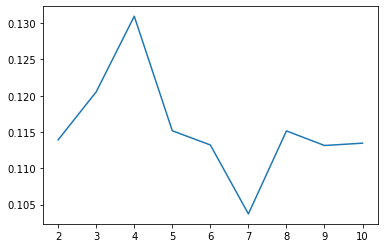

In [298]:
sil = pd.DataFrame(sil)
plt.plot(sil[0], sil[1])
plt.show()

In [299]:
kmean = KMeans(n_clusters=4, random_state=0).fit(df_2)

In [300]:
kmean.labels_

array([3, 3, 0, 1, 3, 0, 0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 1, 1, 0, 1, 1, 2,
       2, 1, 0, 0, 1, 0, 2, 3, 1, 0, 3, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2,
       1, 0, 1, 3, 2, 0, 3, 3, 0, 1, 1, 0, 1, 2, 2, 0, 0, 0, 3, 1, 2, 1,
       0, 1, 1, 0, 1, 0, 1, 2, 2, 3, 1, 0, 0, 2, 3, 1, 2, 2, 0, 2, 0, 1,
       2, 1, 0, 1, 0, 2, 3, 0, 0, 0, 2, 2, 1, 1, 0, 3, 1, 1, 3, 2, 0, 1,
       0, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 3, 0, 1, 1, 3, 2, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 2, 3, 0, 2, 2, 1, 1, 2, 1, 0, 2, 0,
       0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 3, 0, 1, 1, 3, 1, 2, 2, 1, 1, 0, 3,
       2, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 2, 1, 2, 1, 0, 3, 2, 1, 0, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 3, 2, 2, 2, 1, 0,
       1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 3, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 2, 3, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1,

In [301]:
df_org_cleanded['label'] = kmean.labels_

In [303]:
df_org_cleanded.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,Pattern Type,Recommendation,label
0,sexy,low,4.6,M,summer,o-neck,sleevless,empire,cotton,animal,1,3
1,Casual,low,0.0,L,summer,o-neck,Petal,natural,microfiber,animal,0,3
2,vintage,high,0.0,L,Autumn,o-neck,full,natural,polyster,print,0,0
3,Brief,Average,4.6,L,spring,o-neck,full,natural,silk,print,1,1
4,cute,low,4.5,M,summer,o-neck,butterfly,natural,chiffonfabric,dot,0,3


In [310]:
df_2['label'] = kmean.labels_
df_2.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,Pattern Type,label
0,1.271187,1.312229,0.533581,-0.620861,0.236334,-0.512796,0.593387,-1.814668,-0.719663,-3.343164,3
1,-0.852004,1.312229,-1.764282,-1.250665,0.236334,-0.512796,-3.585755,0.503030,0.108521,-3.343164,3
2,1.625053,0.237596,-1.764282,-1.250665,-1.721859,-0.512796,-1.496184,0.503030,1.267979,-0.097651,0
3,-1.205870,-0.837036,0.533581,-1.250665,-0.742763,-0.512796,-1.496184,0.503030,1.764889,-0.097651,1
4,0.209592,1.312229,0.483627,-0.620861,0.236334,-0.512796,-2.889231,0.503030,-0.885300,-2.261326,3


In [312]:
X = df_2.drop('label',axis=1)
y = df_2['label']

In [311]:
import sklearn

In [313]:
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,train_size=0.8,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((394, 10), (99, 10), (394,), (99,))

In [307]:
from sklearn.metrics import accuracy_score

In [316]:
df_2.columns

Index(['Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'Pattern Type', 'label'],
      dtype='object')

In [317]:
df_2.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,Pattern Type,label
0,1.271187,1.312229,0.533581,-0.620861,0.236334,-0.512796,0.593387,-1.814668,-0.719663,-3.343164,3
1,-0.852004,1.312229,-1.764282,-1.250665,0.236334,-0.512796,-3.585755,0.503030,0.108521,-3.343164,3
2,1.625053,0.237596,-1.764282,-1.250665,-1.721859,-0.512796,-1.496184,0.503030,1.267979,-0.097651,0
3,-1.205870,-0.837036,0.533581,-1.250665,-0.742763,-0.512796,-1.496184,0.503030,1.764889,-0.097651,1
4,0.209592,1.312229,0.483627,-0.620861,0.236334,-0.512796,-2.889231,0.503030,-0.885300,-2.261326,3


In [315]:
pred = kmean.predict([['Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'Pattern Type']])

ValueError: could not convert string to float: 'Style'

array([3, 3, 0, 1, 3, 0, 0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 1, 1, 0, 1, 1, 2,
       2, 1, 0, 0, 1, 0, 2, 3, 1, 0, 3, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2,
       1, 0, 1, 3, 2, 0, 3, 3, 0, 1, 1, 0, 1, 2, 2, 0, 0, 0, 3, 1, 2, 1,
       0, 1, 1, 0, 1, 0, 1, 2, 2, 3, 1, 0, 0, 2, 3, 1, 2, 2, 0, 2, 0, 1,
       2, 1, 0, 1, 0, 2, 3, 0, 0, 0, 2, 2, 1, 1, 0, 3, 1, 1, 3, 2, 0, 1,
       0, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 3, 0, 1, 1, 3, 2, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 2, 3, 0, 2, 2, 1, 1, 2, 1, 0, 2, 0,
       0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 3, 0, 1, 1, 3, 1, 2, 2, 1, 1, 0, 3,
       2, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 2, 1, 2, 1, 0, 3, 2, 1, 0, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 3, 2, 2, 2, 1, 0,
       1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 3, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 2, 3, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1,

## KNN Lab MIT ML

In [318]:
from sklearn.neighbors import KNeighborsClassifier

In [324]:
df = pd.read_csv('breast-cancer-wisconsin (2).data')

In [325]:
df.columns = ['Sample code number','clumpThickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion'
                                                              ,'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli',
                                                              'Mitoses','Class']

In [326]:
df.head()

,Sample code number,clumpThickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [327]:
df.drop('Sample code number',axis=1,inplace=True)

In [328]:
df.head()

,clumpThickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [329]:
df.isna().sum()

clumpThickness                 0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [330]:
df.Class.value_counts()

2    457
4    241
Name: Class, dtype: int64

In [331]:
df.Class.replace(to_replace=[2,4],value=[0,1],inplace=True)

In [332]:
df.head()

,clumpThickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1


In [333]:
df.Class.value_counts()

0    457
1    241
Name: Class, dtype: int64

In [334]:
df.shape

(698, 10)

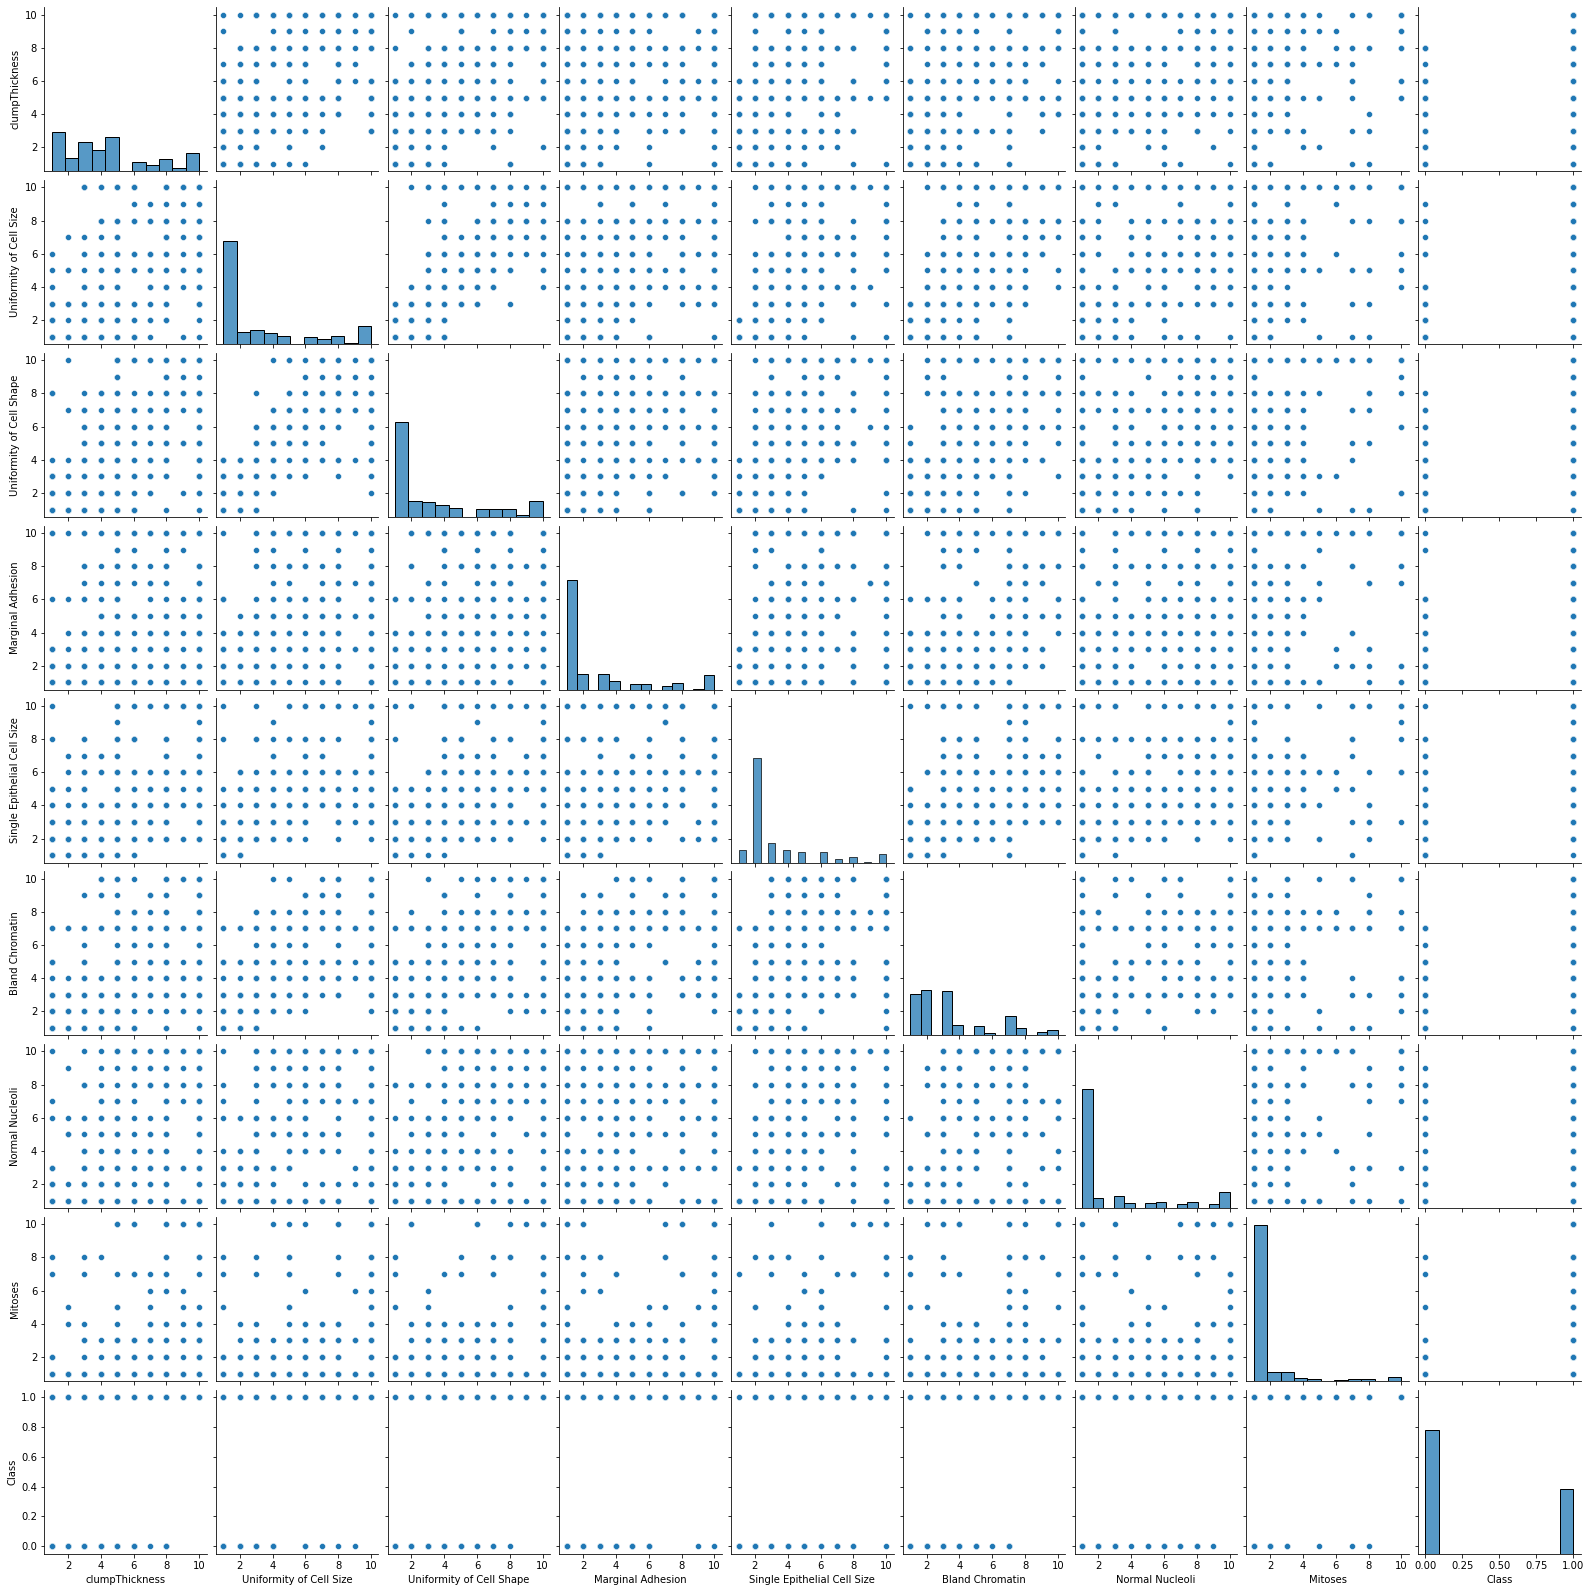

In [335]:
sns.pairplot(df)

In [336]:
df.replace(to_replace='?',value=np.nan,inplace=True)

In [337]:
df.isna().sum()

clumpThickness                  0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [338]:
df.dropna(inplace=True)

In [339]:
df.shape

(682, 10)

In [340]:
df.isna().sum()

clumpThickness                 0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   clumpThickness               682 non-null    int64 
 1   Uniformity of Cell Size      682 non-null    int64 
 2   Uniformity of Cell Shape     682 non-null    int64 
 3   Marginal Adhesion            682 non-null    int64 
 4   Single Epithelial Cell Size  682 non-null    int64 
 5   Bare Nuclei                  682 non-null    object
 6   Bland Chromatin              682 non-null    int64 
 7   Normal Nucleoli              682 non-null    int64 
 8   Mitoses                      682 non-null    int64 
 9   Class                        682 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 58.6+ KB


In [342]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clumpThickness               682 non-null    int64
 1   Uniformity of Cell Size      682 non-null    int64
 2   Uniformity of Cell Shape     682 non-null    int64
 3   Marginal Adhesion            682 non-null    int64
 4   Single Epithelial Cell Size  682 non-null    int64
 5   Bare Nuclei                  682 non-null    int64
 6   Bland Chromatin              682 non-null    int64
 7   Normal Nucleoli              682 non-null    int64
 8   Mitoses                      682 non-null    int64
 9   Class                        682 non-null    int64
dtypes: int64(10)
memory usage: 58.6 KB


In [419]:
from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [409]:
models = []

models.append(("KNN",KNeighborsClassifier(n_neighbors=13)))

In [410]:
def eval_metrics(target,prob,threshold):
        """ target =y_yest,prob=logistic.predict(X_test),Threshold =Cutoff Threshold """
        data=pd.DataFrame()
        data['pred_proba'] = pd.Series(prob)
        data['pred'] = data['pred_proba'].map(lambda x: 1.0 if x > threshold else 0.0)
        accuracy=metrics.accuracy_score(target,data['pred'])
        precision= metrics.precision_score(target,data['pred'])
        recall= metrics.recall_score(target,data['pred'])
        f1_score = metrics.f1_score(target,data['pred'])
        roc_auc = metrics.roc_auc_score(target,data['pred'])
        return(accuracy,precision,recall,f1_score,roc_auc)


In [428]:
param_grid_knn = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [436]:
def Hyper_parameter_tuning(name,model,X_train,y_train):
    grid_results = GridSearchCV(model, param_grid=param_grid_knn,scoring='f1', cv = 3)
    grid_results.fit(X_train, y_train)
    print("Best Score",grid_results.best_score_)
    print("Best parameters",grid_results.best_params_)

In [424]:
def Model_Building_Phase(dataset,target_column,models_list,th,gridsearch=False,cv_validation=False):# defining the fuction to AUtomate modle Building
     #Independent and Dependent Variabls
    X=df.drop([target_column],axis=1)
    Y=df[[target_column]]
    
    #Test and train split
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
   
   
    # fitting Model
    col_names = ['Algorithm', 'Accuracy','Precison','Recall','f1-score','AUC-ROC']
    results_final = pd.DataFrame(columns=col_names)
    i = 0
    for name,model in models_list:
        print("model",name)
        
        model.fit(X_train, y_train)
        # predictions on testing data 
        pred_test = model.predict_proba(X_test)[:,1]
       
        #Evaluation Metrics for the model built
        accuracy,precision,recall,f1_score,roc_auc=eval_metrics(y_test,pred_test,th)
        results_final.loc[i]=[name,accuracy,precision,recall,f1_score,roc_auc]
        i += 1
        #Plotting Feature importance 
#         try:
#             feature_importance_plot(X_train.columns,model.feature_importances_,name)
#         except:
#             print(name +" has no Feature importance")
#             continue
    
        # Grid Search 
        if gridsearch:
            Hyper_parameter_tuning(name,model,X_train,y_train)
            
        
               
        #Applying k-Fold Cross Validation           
        if cv_validation:
            score_cv = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10,scoring='f1')
            print(" K fold Cross validation scores",score_cv)
            print("Mean of K fold cross validation ",score_cv.mean())
            mean_cv=score_cv.mean()
           
       
   
    return(results_final)
        

In [425]:
# Bulid the model for k 3,15
for k in range(3,15,2):
    models=[]
    models.append(("KNN",KNeighborsClassifier(n_neighbors=k)))
    results = Model_Building_Phase(df,'Class',models,th=0.5,gridsearch=False,cv_validation=False)
    print("K=",k)
    print(results)
    print('='*50)

model KNN
K= 3
  Algorithm  Accuracy  Precison  Recall  f1-score   AUC-ROC
0       KNN  0.941606  0.954545   0.875  0.913043  0.926264
model KNN
K= 5
  Algorithm  Accuracy  Precison  Recall  f1-score   AUC-ROC
0       KNN  0.941606  0.954545   0.875  0.913043  0.926264
model KNN
K= 7
  Algorithm  Accuracy  Precison    Recall  f1-score   AUC-ROC
0       KNN  0.948905  0.955556  0.895833  0.924731  0.936681
model KNN
K= 9
  Algorithm  Accuracy  Precison    Recall  f1-score   AUC-ROC
0       KNN  0.956204  0.956522  0.916667   0.93617  0.947097
model KNN
K= 11
  Algorithm  Accuracy  Precison    Recall  f1-score   AUC-ROC
0       KNN  0.956204  0.956522  0.916667   0.93617  0.947097
model KNN
K= 13
  Algorithm  Accuracy  Precison    Recall  f1-score   AUC-ROC
0       KNN  0.948905  0.955556  0.895833  0.924731  0.936681


In [440]:
def Model_Building_Phase1(dataset,target_column,models_list,th,gridsearch=False,cv_validation=False):# defining the fuction to AUtomate modle Building
     #Independent and Dependent Variabls
    X=dataset.drop([target_column],axis=1)
    Y=dataset[[target_column]]
    
    #Test and train split
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
   
   
    # fitting Model
    col_names = ['Algorithm', 'Accuracy','Precison','Recall','f1-score','AUC-ROC']
    results_final = pd.DataFrame(columns=col_names)
    i = 0
    for name,model in models_list:
        print("model",name)
        
        model.fit(X_train, y_train)
        # predictions on testing data 
        pred_test = model.predict_proba(X_test)[:,1]
       
        #Evaluation Metrics for the model built
        accuracy,precision,recall,f1_score,roc_auc=eval_metrics(y_test,pred_test,th)
        results_final.loc[i]=[name,accuracy,precision,recall,f1_score,roc_auc]
        i += 1
        #Plotting Feature importance 
#         try:
#             feature_importance_plot(X_train.columns,model.feature_importances_,name)
#         except:
#             print(name +" has no Feature importance")
#             continue
    
        # Grid Search 
        if gridsearch:
            Hyper_parameter_tuning(name,model,X_train,y_train)
            
        
               
        #Applying k-Fold Cross Validation           
        if cv_validation:
            score_cv = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10,scoring='f1')
            print(" K fold Cross validation scores",score_cv)
            print("Mean of K fold cross validation ",score_cv.mean())
            mean_cv=score_cv.mean()
           
       
   
    return(results_final,mean_cv)
        

In [447]:
# Bulid the model from 3,40 step 2

total_scores = []
for k in range(3,20,2):
    models=[]
    models.append(("KNN",KNeighborsClassifier(n_neighbors=k)))
    results,score = Model_Building_Phase1(df,'Class',models,th=0.5,gridsearch=False,cv_validation=True)
    #print("K=",k)
    #print(results, score)
    total_scores.append(score)
    #print('='*50)

model KNN
 K fold Cross validation scores [0.97435897 0.97435897 0.94736842 0.92682927 0.94736842 1.
 0.97297297 1.         0.92682927 0.94444444]
Mean of K fold cross validation  0.9614530744825995
model KNN
 K fold Cross validation scores [0.97435897 0.97297297 0.97435897 0.95       0.94736842 1.
 0.97297297 1.         0.95       0.94444444]
Mean of K fold cross validation  0.9686476760160971
model KNN
 K fold Cross validation scores [0.97435897 0.97297297 0.97435897 0.92682927 0.88888889 1.
 0.97297297 1.         0.95       0.94444444]
Mean of K fold cross validation  0.9604826496289911
model KNN
 K fold Cross validation scores [0.97435897 0.97297297 0.97435897 0.92682927 0.88888889 1.
 0.94444444 1.         0.95       0.94444444]
Mean of K fold cross validation  0.9576297967761382
model KNN
 K fold Cross validation scores [0.97435897 0.97297297 0.97435897 0.92682927 0.88888889 1.
 0.94444444 1.         0.95       0.94444444]
Mean of K fold cross validation  0.9576297967761382
model

In [448]:
total_scores

[0.9614530744825995,
 0.9686476760160971,
 0.9604826496289911,
 0.9576297967761382,
 0.9576297967761382,
 0.9576297967761382,
 0.95994686994687,
 0.9572478146162355,
 0.9572478146162355]

<AxesSubplot:>

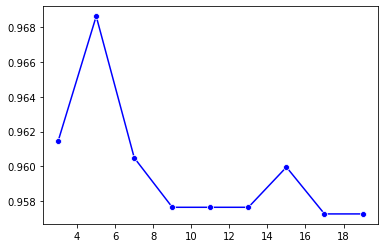

In [449]:
# Plot the line plot at different parameter
sns.lineplot(x=range(3,20,2), y=total_scores,color='blue', marker='o')

In [451]:
# Bulid the model from 3,40 step 2

total_scores2 = []
for k in range(3,20,2):
    models=[]
    models.append(("KNN",KNeighborsClassifier(n_neighbors=k)))
    results,score = Model_Building_Phase1(df,'Class',models,th=0.5,gridsearch=True,cv_validation=True)
    #print("K=",k)
    #print(results, score)
    total_scores2.append(score)
    #print('='*50)

model KNN
Best Score 0.9631978908188586
Best parameters {'algorithm': 'kd_tree', 'leaf_size': 18, 'n_neighbors': 3}
 K fold Cross validation scores [0.97435897 0.97435897 0.94736842 0.92682927 0.94736842 1.
 0.97297297 1.         0.92682927 0.94444444]
Mean of K fold cross validation  0.9614530744825995
model KNN
Best Score 0.9631978908188586
Best parameters {'algorithm': 'kd_tree', 'leaf_size': 18, 'n_neighbors': 3}
 K fold Cross validation scores [0.97435897 0.97297297 0.97435897 0.95       0.94736842 1.
 0.97297297 1.         0.95       0.94444444]
Mean of K fold cross validation  0.9686476760160971
model KNN
Best Score 0.9631978908188586
Best parameters {'algorithm': 'kd_tree', 'leaf_size': 18, 'n_neighbors': 3}
 K fold Cross validation scores [0.97435897 0.97297297 0.97435897 0.92682927 0.88888889 1.
 0.97297297 1.         0.95       0.94444444]
Mean of K fold cross validation  0.9604826496289911
model KNN
Best Score 0.9631978908188586
Best parameters {'algorithm': 'kd_tree', 'lea

In [453]:
knn3 = KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree',leaf_size=18)
knn5 = KNeighborsClassifier(n_neighbors=5)

In [455]:
knn3.fit(X_train,y_train)
knn5.fit(X_train,y_train)

KNeighborsClassifier()

In [456]:
print(knn3.score(X_test,y_test))
print(knn5.score(X_test,y_test))

0.9416058394160584
0.9416058394160584


In [461]:
corssVal3 = cross_val_score(estimator=knn3,X=X_train,y=y_train,cv=10,scoring='f1')

In [462]:
corssVal3.mean()

0.9614530744825995

In [463]:
corssVal5 = cross_val_score(estimator=knn5,X=X_train,y=y_train,cv=10,scoring='f1')

In [464]:
corssVal5.mean()

0.9686476760160971

In [465]:
knn5ht = KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree',leaf_size=18)
knn5ht.fit(X_train,y_train)
print(knn5ht.score(X_test,y_test))
corssVal5 = cross_val_score(estimator=knn5ht,X=X_train,y=y_train,cv=10,scoring='f1')
print(corssVal5.mean())

0.9416058394160584
0.9686476760160971
